# Data Analysis with Pandas 

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np

#pd.set_option('display.mpl_style', 'default') 

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [18]:
close_px = pd.read_csv('data/stock_px.csv', index_col=0, parse_dates= True)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


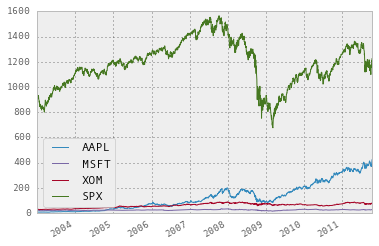

In [31]:
close_px.plot()

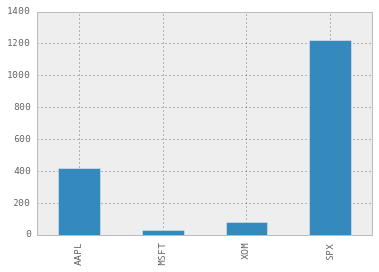

In [35]:
close_px.ix[-1].plot(kind='bar')

In [19]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
(s1+s2).head()

2011-09-12   NaN
2011-09-13   NaN
2011-09-14   NaN
2011-09-15   NaN
2011-09-16   NaN
Name: AAPL, dtype: float64

In [20]:
s1.add(s2, fill_value=0).head()

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
Name: AAPL, dtype: float64

In [21]:
df = close_px.ix[-10:, ['AAPL', 'MSFT', 'SPX']]
df

,AAPL,MSFT,SPX
2011-10-03,374.60,24.53,1099.23
2011-10-04,372.50,25.34,1123.95
2011-10-05,378.25,25.89,1144.03
2011-10-06,377.37,26.34,1164.97
2011-10-07,369.80,26.25,1155.46
2011-10-10,388.81,26.94,1194.89
2011-10-11,400.29,27.00,1195.54
2011-10-12,402.19,26.96,1207.25
2011-10-13,408.43,27.18,1203.66
2011-10-14,422.00,27.27,1224.58


In [22]:
df.mean()

AAPL     389.424
MSFT      26.370
SPX     1171.356
dtype: float64

## apply

In [28]:
df.apply(np.mean, axis=1)
#df.mean(1)

2011-10-03    499.453333
2011-10-04    507.263333
2011-10-05    516.056667
2011-10-06    522.893333
2011-10-07    517.170000
2011-10-10    536.880000
2011-10-11    540.943333
2011-10-12    545.466667
2011-10-13    546.423333
2011-10-14    557.950000
dtype: float64

In [33]:
close_px.SPX.idxmax()

Timestamp('2007-10-09 00:00:00')